# Regresión logística multinomial sobre Iris

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=0)

## Sin *cross-validation*

### Entrenamiento y predicción

In [3]:
log_reg = LogisticRegression().fit(X_train, y_train) # entrenamos el modelo
y_pred = log_reg.predict(X_test) # predecimos los valores de test

### *Accuracy*

In [4]:
print("Exactitud de la regresión logística:")
print("     con cálculo manual: ", np.sum(y_pred==y_test)/len(y_test))
print("     con función 'accuracy_score': ", accuracy_score(y_test, y_pred))
print("     con método 'score': ", log_reg.score(X_test, y_test))

Exactitud de la regresión logística:
     con cálculo manual:  0.9333333333333333
     con función 'accuracy_score':  0.9333333333333333
     con método 'score':  0.9333333333333333


### Matriz de confusión

[[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]


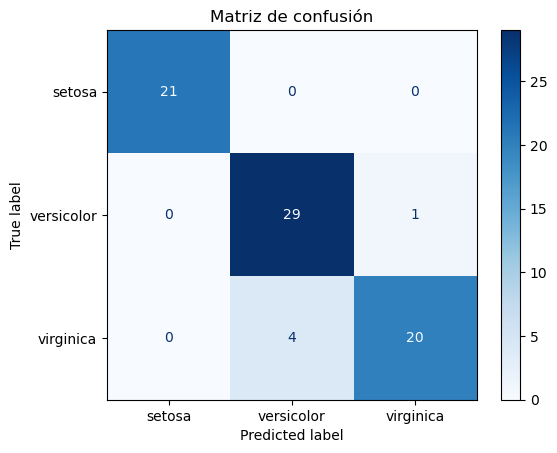

In [5]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_estimator( # Representación gráfica de la matriz de confusión
        log_reg, X_test, y_test,
        display_labels=iris.target_names,
        cmap=plt.cm.Blues,
    ).ax_.set_title("Matriz de confusión")
plt.show()

### *Precision*, *recall* y *f1-score*

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



La precisión de cada clase es el ratio de elementos correctamente clasificados o verdaderos positivos (TP) sobre el total de elementos clasificados como de dicha clase (TP+FP). En la matriz de confusión esto se corresponde con el valor de la clase en la diagonal (verdaderos positivos de esa clase) dividido entre la suma de los valores de la columna (clasificados como de esa clase).

In [7]:
print("Precisión clase 2:", cm[2,2]/np.sum(cm[:,2])) # Sobre la matriz de confusión
print("Recall:", recall_score(y_test, y_pred, average=None)[2])

Precisión clase 2: 0.9523809523809523
Recall: 0.8333333333333334


In [8]:
print("Precisiones por clase:", precision_score(y_test, y_pred, average=None)) 

Precisiones por clase: [1.         0.87878788 0.95238095]


Cuando tenemos varias clases, la precisión global es el promedio de las precisión de cada clase, pero este promedio puede hacerse teniendo en cuenta el número de elementos de cada clase (ponderado) o no (macro). El promedio macro penalizará si hay un mal rendimiento en una clase minoritaria.

In [9]:

print("Precisión:", precision_score(y_test, y_pred, average="macro"))
print("Precisión:", precision_score(y_test, y_pred, average=None).mean())
print("Precisión:", precision_score(y_test, y_pred, average="weighted"))

Precisión: 0.9437229437229439
Precisión: 0.9437229437229439
Precisión: 0.936277056277056


In [10]:
print("Recall clase 2:", cm[2,2]/np.sum(cm[2,:])) # Sobre la matriz de confusión
print("Recall clase 2:", recall_score(y_test, y_pred, average=None)[2])

Recall clase 2: 0.8333333333333334
Recall clase 2: 0.8333333333333334


In [11]:
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average=None).mean())
print("Recall:", recall_score(y_test, y_pred, average="weighted"))

Recall: 0.9333333333333335
Recall: 0.9333333333333335
Recall: 0.9333333333333333


La matriz de confusión puede también mostrarse normalizada, dividiendo cada elemento por el total de elementos en la fila correspondiente. De este modo, cada elemento de la matriz de confusión normalizada representa la probabilidad de que un elemento de la clase real sea clasificado en la clase predicha.

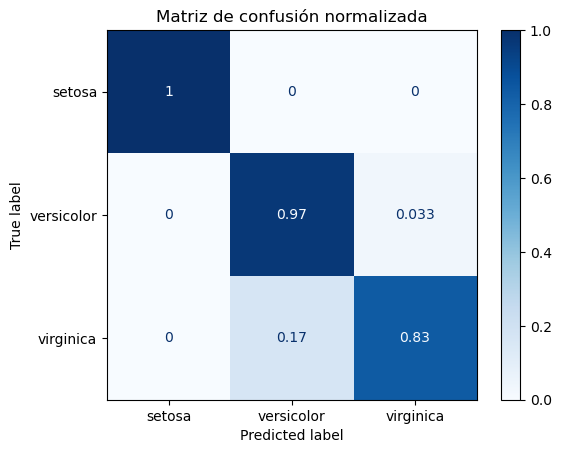

In [12]:
disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test,
        display_labels=iris.target_names, cmap=plt.cm.Blues,
        normalize='true' # normaliza la matriz de confusión
    ).ax_.set_title("Matriz de confusión normalizada")
plt.show()

## Con *Cross-validation*

### Entrenamiento y predicción

In [13]:
y_train_pred = cross_val_predict(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)

### *Accuracy*

In [14]:
cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5).mean() # scoring="accuracy" por defecto

0.9733333333333334

In [15]:
accuracy_score(y_train, y_train_pred)

0.9733333333333334

### Matriz de confusión

In [16]:
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[29  0  0]
 [ 0 18  2]
 [ 0  0 26]]


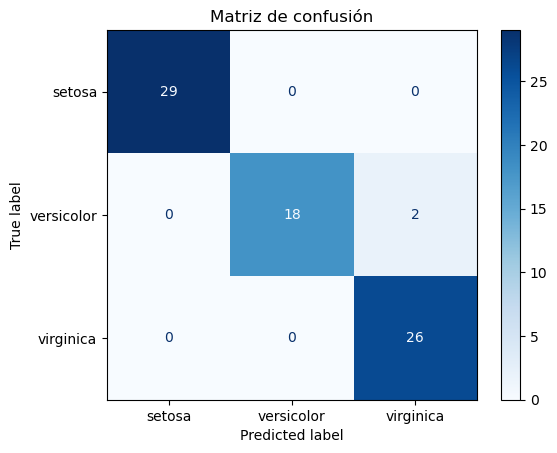

In [17]:
ConfusionMatrixDisplay(confusion_matrix=cm,
        display_labels=iris.target_names,
    ).plot(cmap=plt.cm.Blues).ax_.set_title("Matriz de confusión")
plt.show()

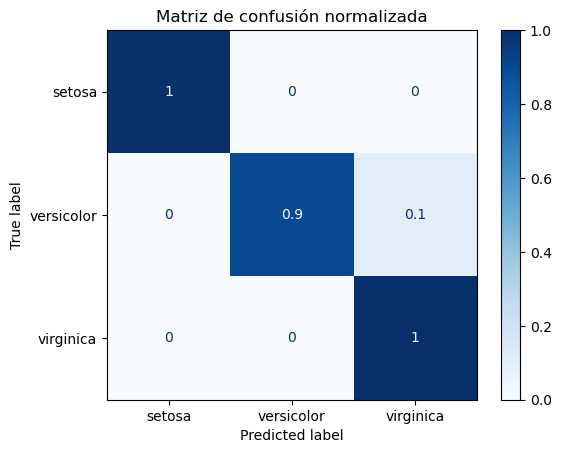

In [18]:
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]

cmd = ConfusionMatrixDisplay(cm_norm,
        display_labels=iris.target_names,
    )
cmd.plot(cmap=plt.cm.Blues)
cmd.ax_.set_title("Matriz de confusión normalizada")
plt.show()

### *Precision*, *recall* y *f1-score*

In [19]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.90      0.95        20
           2       0.93      1.00      0.96        26

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



In [20]:
print("Precisión:", precision_score(y_train, y_train_pred, average="weighted"))
print("Precisión:", cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5, scoring="precision_weighted").mean()) # TODO: diferencia en 3er decimal

print("Recall:", recall_score(y_train, y_train_pred, average="weighted"))
print("Recall:", cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5, scoring="recall_weighted").mean())

Precisión: 0.9752380952380952
Precisión: 0.9774603174603176
Recall: 0.9733333333333334
Recall: 0.9733333333333334


## Fuentes

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
